In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize #package for flattening json in pandas df
from PIL import Image

import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem
from scipy.stats import t

import statistics
import math


In [2]:
info_car2PPO_episode_1  = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/IRL_protest_result_three_way/image/IRL_protest_result_imagenoise_three_way.json', lines=True)
info_car2PPO_episode_1.columns = info_car2PPO_episode_1.columns.str.replace('noise', 'image noise')


In [4]:
info_car2PPO_episode_1['reward']

0       -7.084823
1       -7.069368
2       -7.204107
3       -7.256062
4       -7.258529
           ...   
29995   -2.387244
29996   -2.899599
29997   -2.424856
29998   -2.930897
29999   -3.065586
Name: reward, Length: 30000, dtype: float64

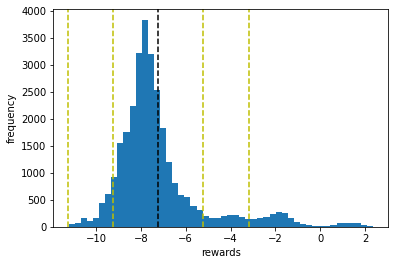

In [5]:
plt.hist(info_car2PPO_episode_1['reward'],bins=50,histtype='stepfilled')
plt.xlabel('rewards')
plt.ylabel('frequency')
m = statistics.mean(info_car2PPO_episode_1['reward'])
sd = statistics.stdev(info_car2PPO_episode_1['reward'])

plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')

plt.show()

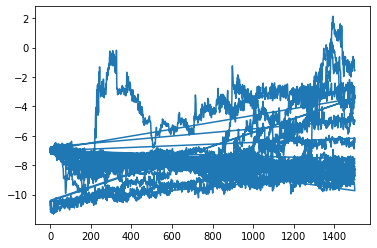

In [20]:
plt.plot(info_car2PPO_episode_1['state'], info_car2PPO_episode_1['reward'])


In [6]:
myMean = info_car2PPO_episode_1['reward'].mean()
myMean

-7.218693453488

In [7]:
SE = sem(info_car2PPO_episode_1['reward'])
SE

0.011612824974370764

In [8]:
confLevel = 0.95

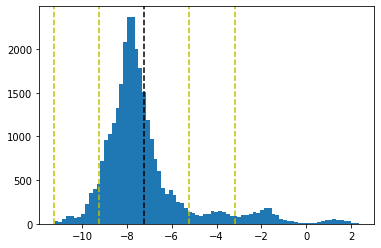

In [9]:
plt.hist(info_car2PPO_episode_1['reward'],bins=80)

m = statistics.mean(info_car2PPO_episode_1['reward'])
sd = statistics.stdev(info_car2PPO_episode_1['reward'])

plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')
Confidence_interval = sd/math.sqrt(3982)
Confidence_interval = Confidence_interval*1.960


plt.show()

In [10]:
print ("Mean : ", m)
print ("Std Deviation : ", sd)
print ("1st Std Interval : ", m-sd , m+sd )
print ("2nd Std Interval : ", m - 2*sd , m + 2*sd )
print ("Confidence Interval : ", Confidence_interval)

print ("Confidence Interval : ", m - Confidence_interval , m + Confidence_interval)


Mean :  -7.218693453488
Std Deviation :  2.0114002875014907
1st Std Interval :  -9.23009374098949 -5.20729316598651
2nd Std Interval :  -11.241494028490981 -3.1958928784850187
Confidence Interval :  0.062474667206289906
Confidence Interval :  -7.28116812069429 -7.15621878628171


In [15]:
t.interval(0.65,info_car2PPO_episode_1['reward'],loc=m, scale=sd)


(array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]))

<AxesSubplot:xlabel='reward', ylabel='Density'>

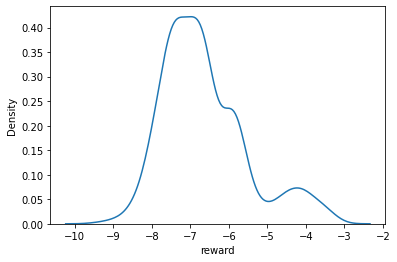

In [12]:
sns.kdeplot(info_car2PPO_episode_1['reward'],)


<AxesSubplot:xlabel='state', ylabel='Density'>

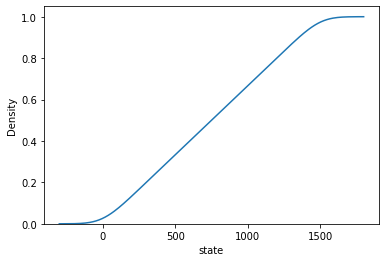

In [13]:
sns.kdeplot(
    data=info_car2PPO_episode_1['reward'], x=info_car2PPO_episode_1['state'],
    cumulative=True, common_norm=False, common_grid=True,
)

<AxesSubplot:xlabel='state', ylabel='reward'>

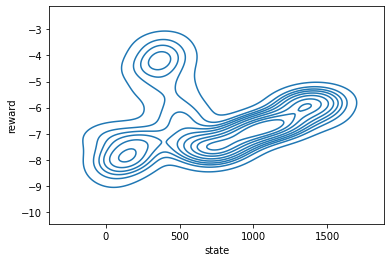

In [14]:
geyser = sns.load_dataset("geyser")
sns.kdeplot(data=info_car2PPO_episode_1, x="state", y="reward")

<AxesSubplot:xlabel='state', ylabel='reward'>

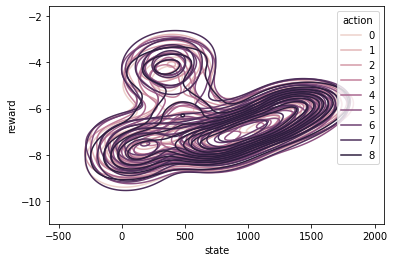

In [15]:
sns.kdeplot(data=info_car2PPO_episode_1, x="state", y="reward", hue="action"
)


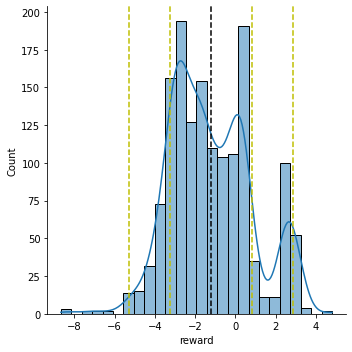

In [19]:
sns.displot(data=info_car2PPO_episode_1, x="reward", kde=True)
plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')

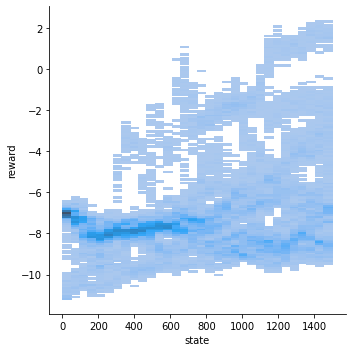

In [11]:
sns.displot(data=info_car2PPO_episode_1, x="state", y="reward")


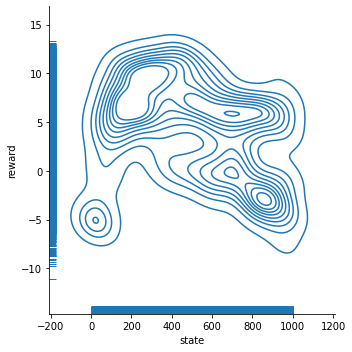

In [19]:
g = sns.displot(data=info_car2PPO_episode_1, x="state", y="reward", kind="kde", rug=True)


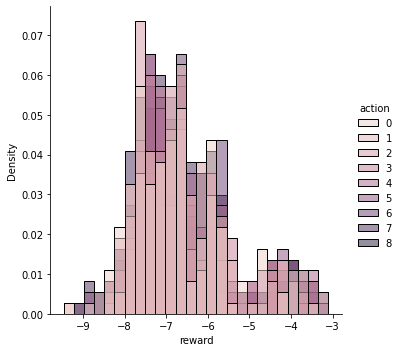

In [17]:

sns.displot(info_car2PPO_episode_1, x="reward", hue="action", stat="density")


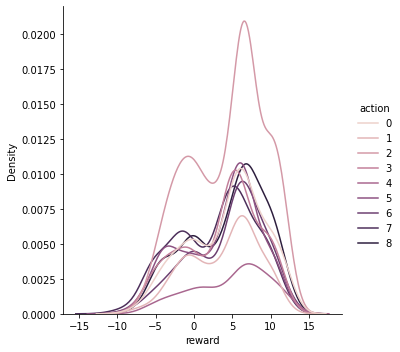

In [21]:
sns.displot(info_car2PPO_episode_1, x="reward", hue="action", kind="kde")


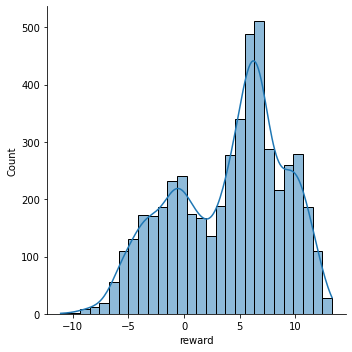

In [22]:
sns.displot(info_car2PPO_episode_1, x="reward", kde=True)


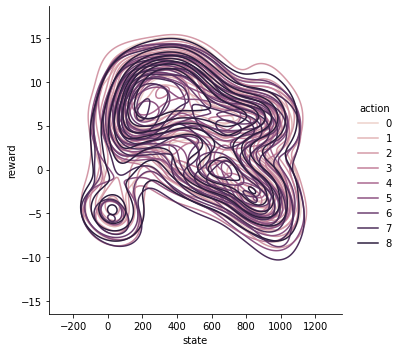

In [23]:
sns.displot(info_car2PPO_episode_1, x="state", y="reward", hue="action", kind="kde")


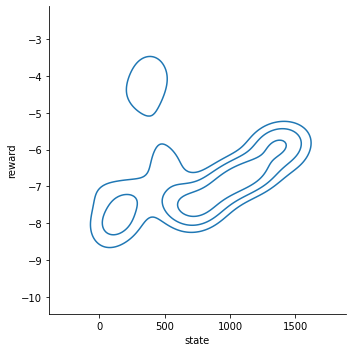

In [18]:
sns.displot(info_car2PPO_episode_1, x="state", y="reward", kind="kde", thresh=.2, levels=4)


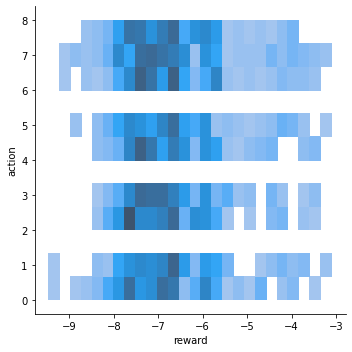

In [19]:
sns.displot(info_car2PPO_episode_1, x="reward", y="action", )


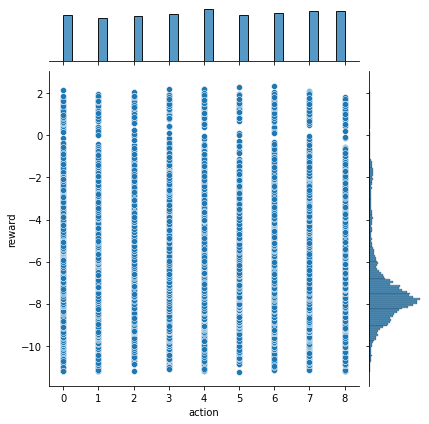

In [12]:
sns.jointplot(data=info_car2PPO_episode_1, x="action", y="reward")


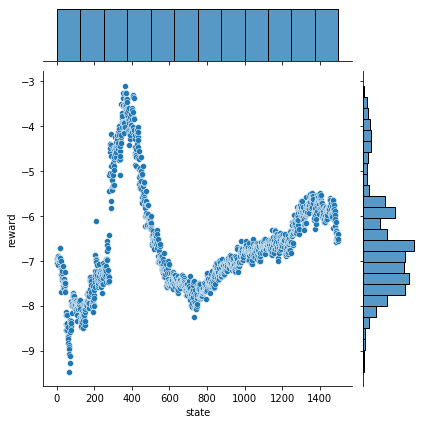

In [25]:
sns.jointplot(data=info_car2PPO_episode_1, x="state", y="reward")


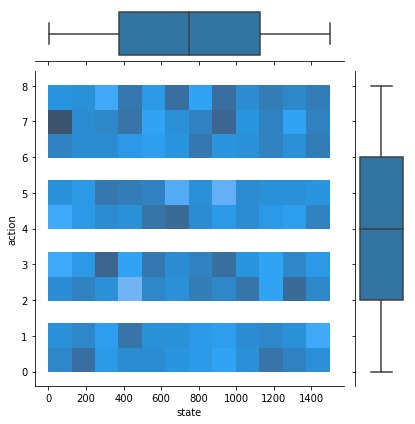

In [22]:
g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="action")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

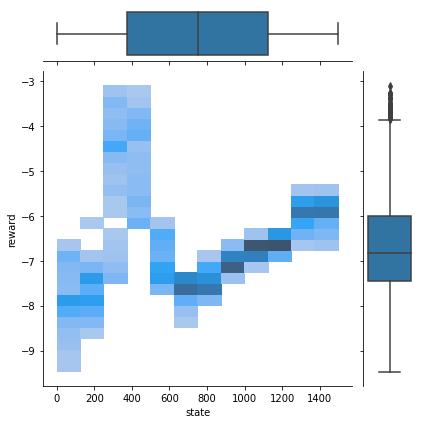

In [23]:
g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="reward")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

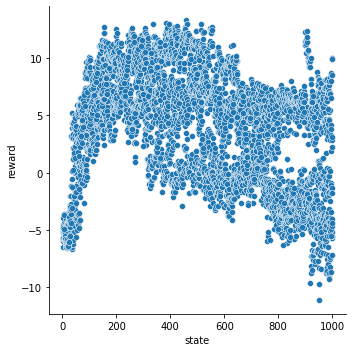

In [31]:
sns.relplot(data=info_car2PPO_episode_1, x="state", y="reward")
# sns.rugplot(data=info_car2PPO_episode_1, x="bill_length_mm", y="bill_depth_mm")

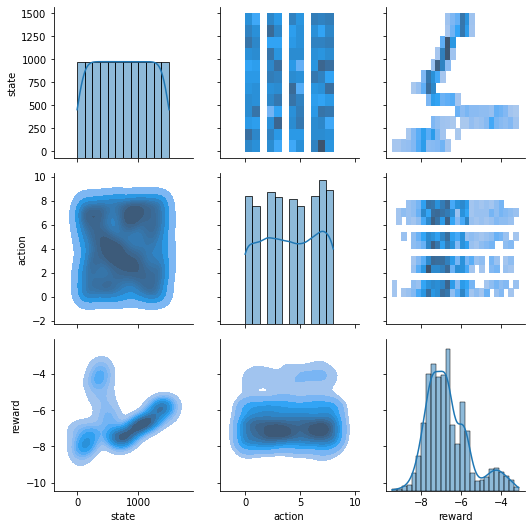

In [24]:
g = sns.PairGrid(info_car2PPO_episode_1)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

/home/aizaz/anaconda3/envs/MAD-ARL/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='reward'>

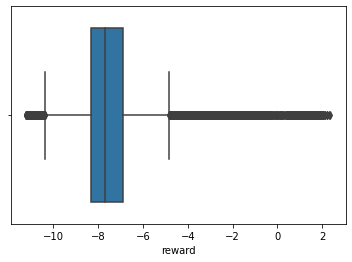

In [13]:
sns.boxplot(info_car2PPO_episode_1['reward'])


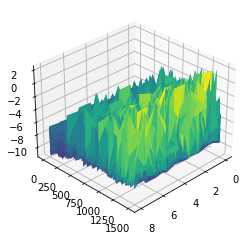

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
# Get the data (csv file is hosted on the web)
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 

 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(30, 45)

ax.plot_trisurf(info_car2PPO_episode_1['action'], info_car2PPO_episode_1['state'], info_car2PPO_episode_1['reward'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 


In [3]:
# Episode 1

info_car1 = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/IRL_protest_result_three_way/image/info_car1.json', lines=True)
info_car1 = pd.concat([info_car1.drop(['control'], axis=1), info_car1['control'].apply(pd.Series)], axis=1)
info_car2 = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/IRL_protest_result_three_way/image/info_car2.json', lines=True)
info_car2 = pd.concat([info_car2.drop(['control'], axis=1), info_car2['control'].apply(pd.Series)], axis=1)
info_car3 = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/IRL_protest_result_three_way/image/info_car3.json', lines=True)
info_car3 = pd.concat([info_car3.drop(['control'], axis=1), info_car3['control'].apply(pd.Series)], axis=1)


In [16]:
info_car1.shape

(30071, 35)

In [17]:
print((info_car3['collision_vehicles']!= 0).values.sum()/30000,"collision_vehicles")
print((info_car3['collision_other']!= 0).values.sum()/30000, "collision_other")
print((info_car3['intersection_offroad'] != 0).values.sum()/30000,"intersection_offroad")
print ((info_car3['intersection_otherlane'] != 0).values.sum()/30000, "intersection_otherlane")


0.175 collision_vehicles
0.0249 collision_other
0.19826666666666667 intersection_offroad
0.19826666666666667 intersection_otherlane


In [4]:
SE_CO = sem(info_car3['collision_vehicles'] != 0)
print (SE_CO)
SE_CP = sem(info_car3['collision_other'] != 0)
print (SE_CP)
SE_OS = sem(info_car3['intersection_otherlane'] != 0)
print (SE_OS)


0.0021891458865950513
0.0008975472520901012
0.002297135183612592


In [8]:
print (info_car3['collision_vehicles'].idxmax())
print (info_car3['collision_other'].idxmax())
print (info_car3['intersection_offroad'].idxmax())

# 268
# 0.134

26801
14324
23156


In [5]:
print (info_car3['collision_vehicles'].idxmax()*0.134)
print (info_car3['collision_other'].idxmax()*0.134)
print (info_car3['intersection_offroad'].idxmax()*0.134)

# 268
# 0.134

3591.3340000000003
1919.4160000000002
3102.904


In [9]:
mean_collision_vehicles = []
for chunk in np.array_split(info_car2['collision_vehicles'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_collision_vehicles.append((res))
    print (x, " : ", res)
mean_collision_vehicles = statistics.mean(mean_collision_vehicles)
mean_collision_vehicles

0  :  1
1504  :  5
4201  :  1202
4512  :  13
6016  :  17
8269  :  770
9024  :  25
11141  :  642
12032  :  33
13536  :  37
15040  :  41
16544  :  45
18047  :  48
20416  :  917
21053  :  54
22556  :  57
24059  :  60
26503  :  1004
27065  :  66
29553  :  1054


304.55

In [10]:
mean_collision_other = []
for chunk in np.array_split(info_car2['collision_other'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_collision_other.append((res))
    print (x, " : ", res)
mean_collision_other = statistics.mean(mean_collision_other)
mean_collision_other

0  :  1
1504  :  5
3008  :  9
4512  :  13
6016  :  17
7520  :  21
10310  :  1311
10528  :  29
12032  :  33
13536  :  37
15040  :  41
17806  :  1307
18047  :  48
19550  :  51
21053  :  54
22556  :  57
24059  :  60
25562  :  63
27065  :  66
28568  :  69


164.6

In [11]:
mean_intersection_offroad = []
for chunk in np.array_split(info_car2['intersection_offroad'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_intersection_offroad.append((res))
    print (x, " : ", res)
mean_intersection_offroad = statistics.mean(mean_intersection_offroad)
mean_intersection_offroad

0  :  1
1504  :  5
3008  :  9
4512  :  13
6016  :  17
7520  :  21
9985  :  986
10528  :  29
12032  :  33
13536  :  37
15040  :  41
17843  :  1344
18047  :  48
19550  :  51
21053  :  54
22556  :  57
24059  :  60
25562  :  63
27065  :  66
28568  :  69


150.2

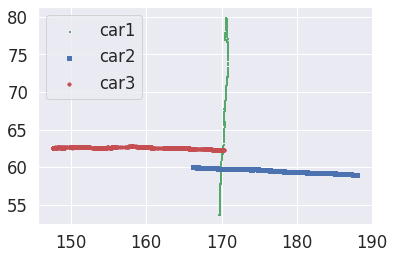

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(info_car1['x'][:1500], info_car1['y'][:1500], s=1, c='g', marker="s", label='car1')
ax1.scatter(info_car2['x'][:1500], info_car2['y'][:1500], s=10, c='b', marker="s", label='car2')
ax1.scatter(info_car3['x'][:1500],info_car3['y'][:1500], s=10, c='r', marker="o", label='car3')
plt.legend(loc='upper left');
plt.show()

### RQ2

In [6]:
print((info_car2PPO_episode_1['noise']!= 0).values.sum()/30000,"noise")


0.0017666666666666666 noise


In [7]:
info_car2PPO_episode_1['noise'].value_counts()


0    29947
1       53
Name: noise, dtype: int64

In [8]:
print (info_car2PPO_episode_1['noise'].idxmax())


1507


In [6]:
mean_noise = []
for chunk in np.array_split(info_car2PPO_episode_1['noise'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_noise.append((res))
    print (x, " : ", res)
mean_noise = statistics.mean(mean_noise)
mean_noise

0  :  1
1507  :  8
3000  :  1
4500  :  1
6000  :  1
7500  :  1
9000  :  1
10500  :  1
12000  :  1
13500  :  1
15000  :  1
16502  :  3
18000  :  1
19500  :  1
21000  :  1
22500  :  1
24000  :  1
25500  :  1
27000  :  1
28500  :  1


1.45

### RQ3

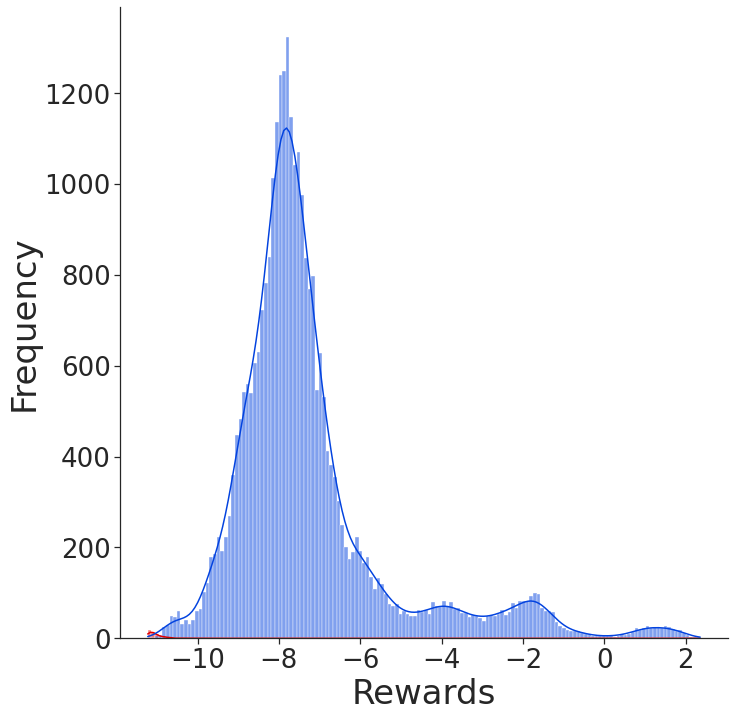

In [4]:
sns.reset_orig()
sns.set(font_scale = 1.5)
color = sns.color_palette()
sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
my_palette = sns.color_palette(["#0343DF", "#E50000"])



g = sns.displot(info_car2PPO_episode_1, x="reward", kde=True,  hue="image noise",palette=my_palette,height=10,color=color[0], legend=False)
# plt.axvline(-8, color='y', linestyle='dashed')
# g.fig.set_figwidth(8)
# g.fig.set_figheight(8)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
g.set_axis_labels('Rewards','Frequency',fontsize=34)

plt.savefig("RQ3_threeway_22.jpg", bbox_inches = "tight")

In [10]:
df = pd.DataFrame()
df['x'] = info_car2['x']
df['y'] = info_car2['y']
df['noise'] = info_car2PPO_episode_1['noise']

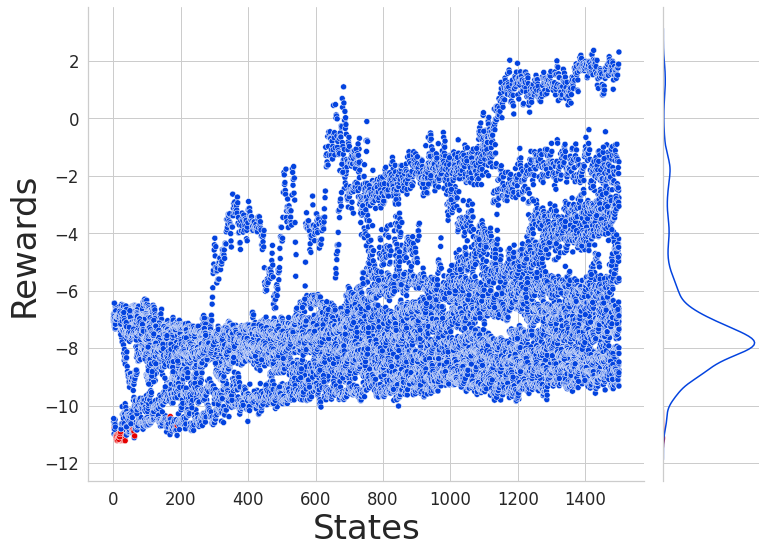

In [5]:
sns.reset_orig()
# sns.color_palette("rocket")
my_palette = sns.color_palette(["#0343DF", "#E50000"])

sns.set(font_scale = 1.5)

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("whitegrid")

g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="reward", hue="image noise",palette=my_palette)
g.plot(sns.scatterplot, sns.kdeplot)
g.ax_marg_x.remove()
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
g.set_axis_labels('States','Rewards',fontsize=34)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
g.ax_joint.legend_.remove()
plt.savefig("RQ3_threeway_23.jpg", bbox_inches = "tight")

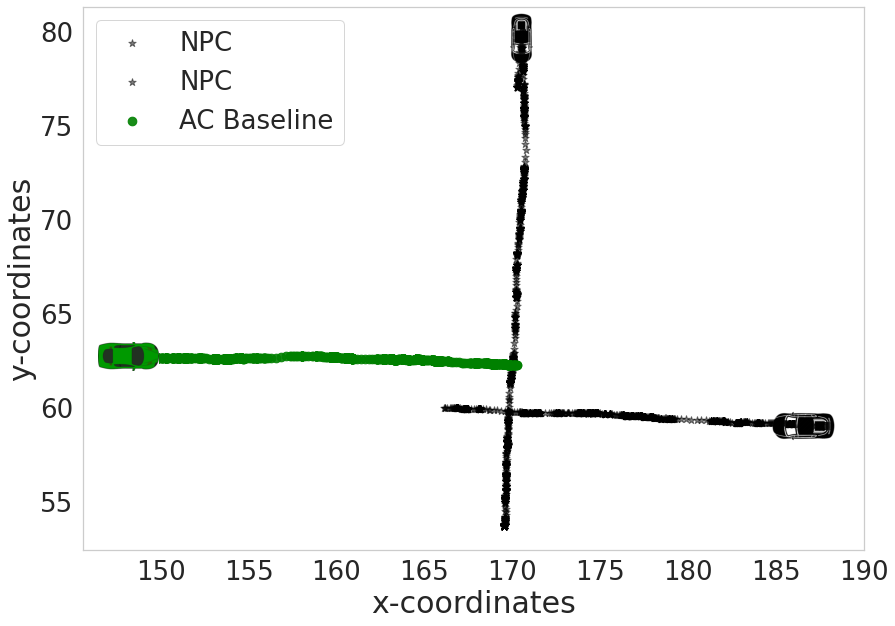

In [6]:
# fig = plt.figure(figsize=(10,8))
# ax1 = fig.add_subplot(111)




# ax1.scatter(info_car1['x'][:1500], info_car1['y'][:1500], s=60, c='black', marker="*", label='car1')
# ax1.scatter(info_car2['x'][:1500], info_car2['y'][:1500], s=60, c='black', marker="*", label='car2')
# ax1.scatter(info_car3['x'][:1500],info_car3['y'][:1500], s=300, c='g', marker="o", label='car3')

# plt.legend(loc='upper left')
# plt.show()



fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][:1500], info_car1['y'][:1500], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car2['x'][:1500],info_car2['y'][:1500], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car3['x'][:1500], info_car3['y'][:1500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)



im = Image.open('images_1.png')
newax = fig.add_axes([0.14, 0.355, 0.06, 0.06], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('black.png')
newax1 = fig.add_axes([0.8, 0.255, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')

im2 = Image.open('black_car-removebg-preview.png')
newax2 = fig.add_axes([0.538, 0.79, 0.09, 0.09], anchor='NW', zorder=1)
newax2.imshow(im2)
newax2.axis('off')
plt.savefig("RQ3_threeway_3.jpg", bbox_inches = "tight")


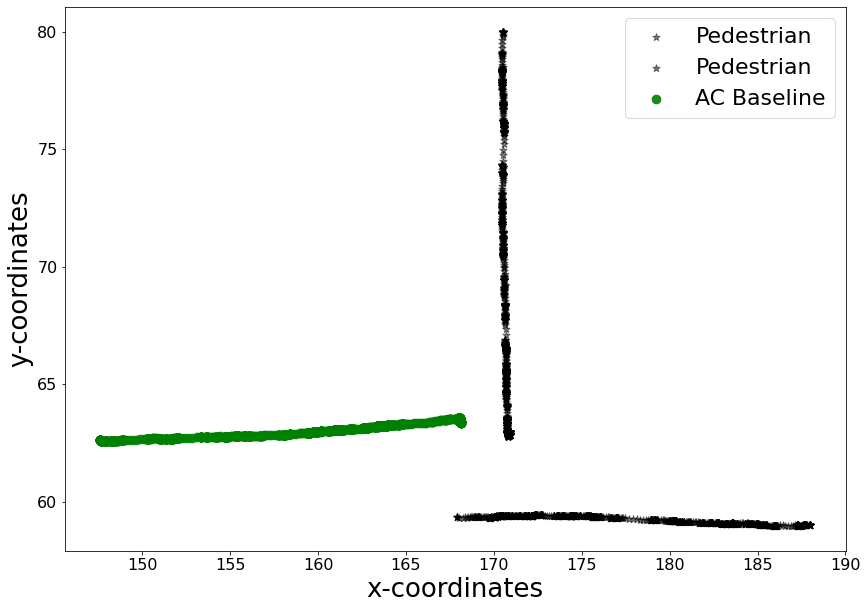

In [5]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][6072:7571], info_car1['y'][6072:7571], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car2['x'][6072:7571],info_car2['y'][6072:7571], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car3['x'][6072:7571], info_car3['y'][6072:7571], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


plt.legend(loc='upper right', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
plt.savefig("RQ3_threeway_4.pdf")


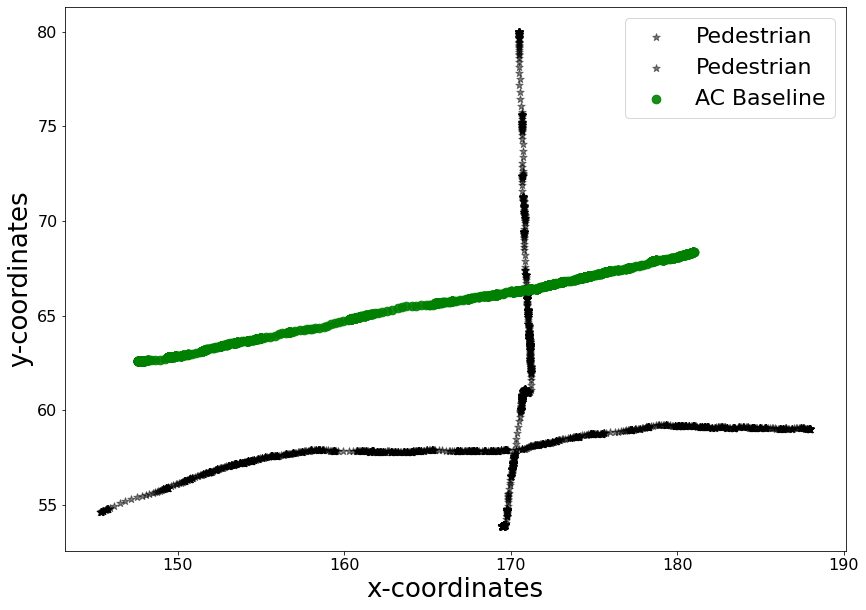

In [6]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][10572:12071], info_car1['y'][10572:12071], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car2['x'][10572:12071],info_car2['y'][10572:12071], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car3['x'][10572:12071], info_car3['y'][10572:12071], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


plt.legend(loc='upper right', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
plt.savefig("RQ3_threeway_5.pdf")


findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


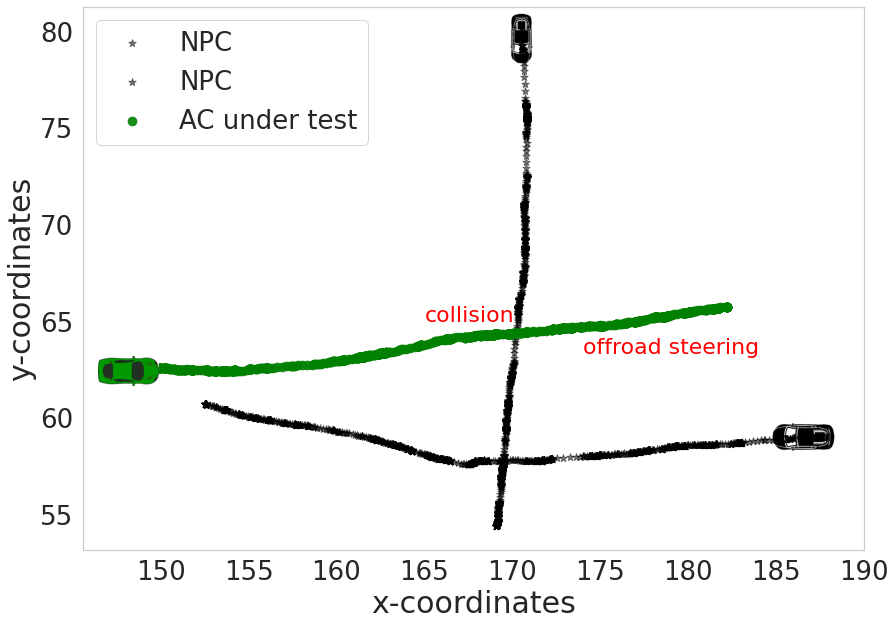

In [7]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][12072:13571], info_car1['y'][12072:13571], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car2['x'][12072:13571],info_car2['y'][12072:13571], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car3['x'][12072:13571], info_car3['y'][12072:13571], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

plt.text(174, 63.3, "offroad steering", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')
plt.text(165, 65, "collision", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')


im = Image.open('images_1.png')
newax = fig.add_axes([0.14, 0.335, 0.06, 0.06], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('black.png')
newax1 = fig.add_axes([0.8, 0.24, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')

im2 = Image.open('black_car-removebg-preview.png')
newax2 = fig.add_axes([0.538, 0.79, 0.09, 0.09], anchor='NW', zorder=1)
newax2.imshow(im2)
newax2.axis('off')

# plt.text(171.2, 63.5, "offroad steering + collision", horizontalalignment='left', size='16', color='red', weight='semibold')

plt.savefig("RQ3_threeway_6.jpg", bbox_inches = "tight")


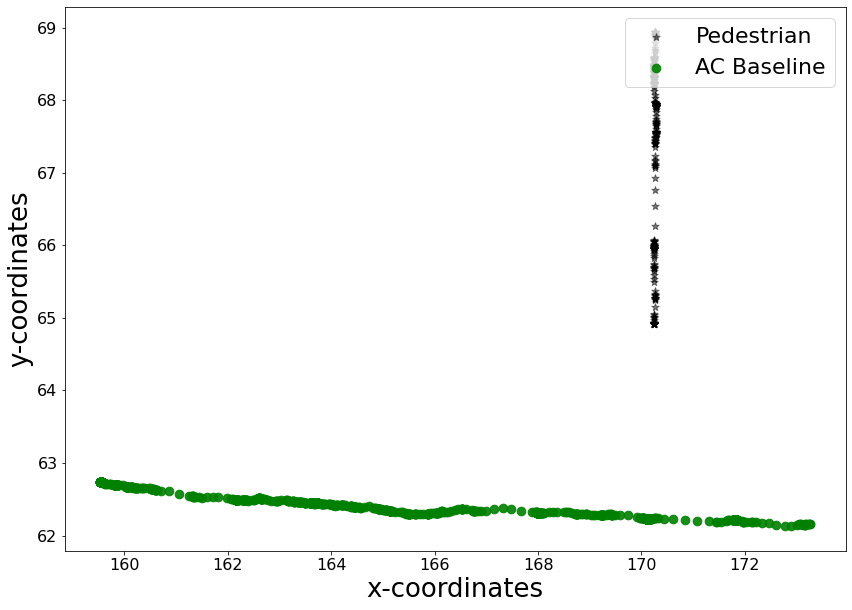

In [17]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][18702:19000], info_car1['y'][18702:19000], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
# ax1.scatter(info_car2['x'][18702:19570],info_car2['y'][18702:19570], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car3['x'][18702:19570], info_car3['y'][18702:19570], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


plt.legend(loc='upper right', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
# plt.text(171.2, 63.5, "offroad steering + collision", horizontalalignment='left', size='16', color='red', weight='semibold')

plt.savefig("RQ3_threeway_7.pdf")

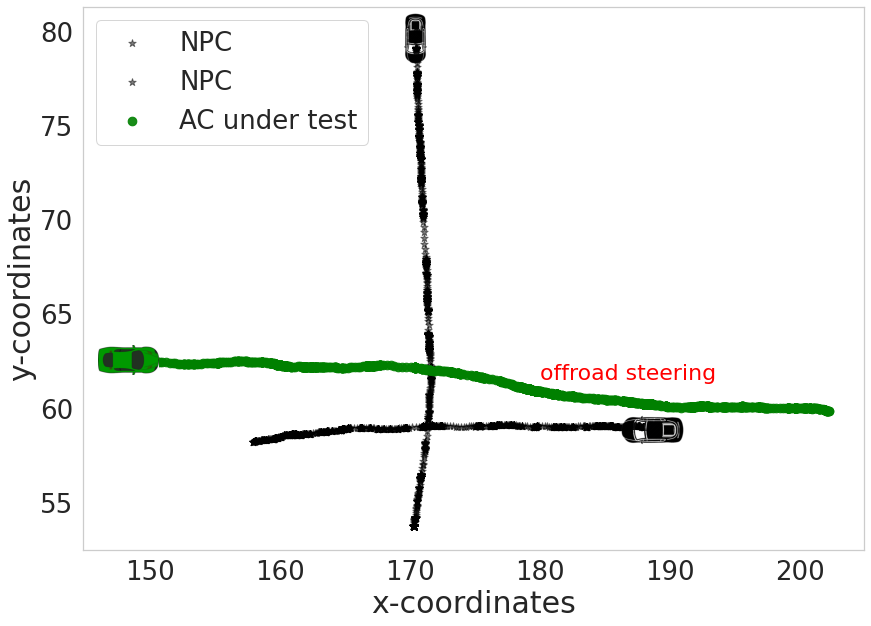

In [8]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][19572:21071], info_car1['y'][19572:21071], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car2['x'][19572:21071],info_car2['y'][19572:21071], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car3['x'][19572:21071], info_car3['y'][19572:21071], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

plt.text(180.0, 61.5, "offroad steering", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')
# plt.text(180.0, 61.5, "collision", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')


im = Image.open('images_1.png')
newax = fig.add_axes([0.14, 0.35, 0.06, 0.06], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('black.png')
newax1 = fig.add_axes([0.65, 0.25, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')

im2 = Image.open('black_car-removebg-preview.png')
newax2 = fig.add_axes([0.433, 0.79, 0.09, 0.09], anchor='NW', zorder=1)
newax2.imshow(im2)
newax2.axis('off')
# plt.text(180.0, 61.5, "offroad steering ", horizonta\lalignment='left', size='16', color='red', weight='semibold')

plt.savefig("RQ3_threeway_8.jpg", bbox_inches = "tight")

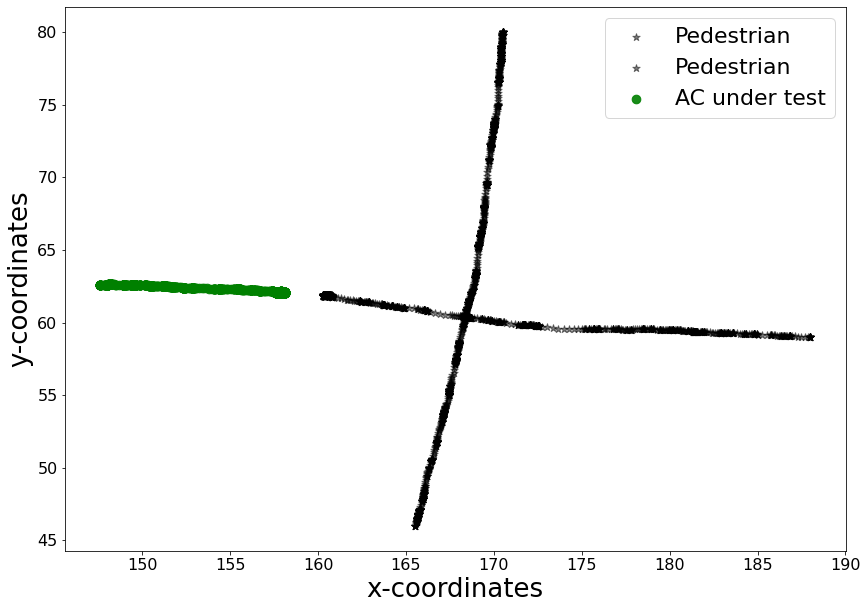

In [37]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][21072:22571], info_car1['y'][21072:22571], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car2['x'][21072:22571],info_car2['y'][21072:22571], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car3['x'][21072:22571], info_car3['y'][21072:22571], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)


plt.legend(loc='upper right', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
# plt.text(180.0, 61.5, "offroad steering ", horizontalalignment='left', size='16', color='red', weight='semibold')

plt.savefig("RQ3_threeway_9.pdf")

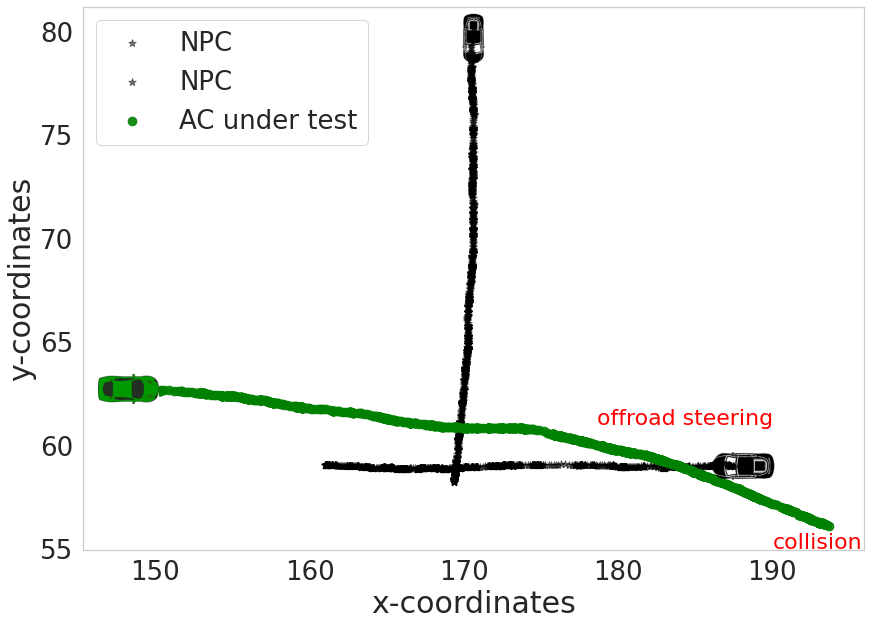

In [9]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][24072:25571], info_car1['y'][24072:25571], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car2['x'][24072:25571],info_car2['y'][24072:25571], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car3['x'][24072:25571], info_car3['y'][24072:25571], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

plt.text(178.6, 61, "offroad steering", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')
plt.text(190.0, 55, "collision", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')


im = Image.open('images_1.png')
newax = fig.add_axes([0.14, 0.31, 0.06, 0.06], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('black.png')
newax1 = fig.add_axes([0.74, 0.2, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')

im2 = Image.open('black_car-removebg-preview.png')
newax2 = fig.add_axes([0.49, 0.79, 0.09, 0.09], anchor='NW', zorder=1)
newax2.imshow(im2)
newax2.axis('off')
# plt.text(180.6, 60, "offroad steering + collision ", horizontalalignment='left', size='14', color='red', weight='semibold')

plt.savefig("RQ3_threeway_10.jpg", bbox_inches = "tight")

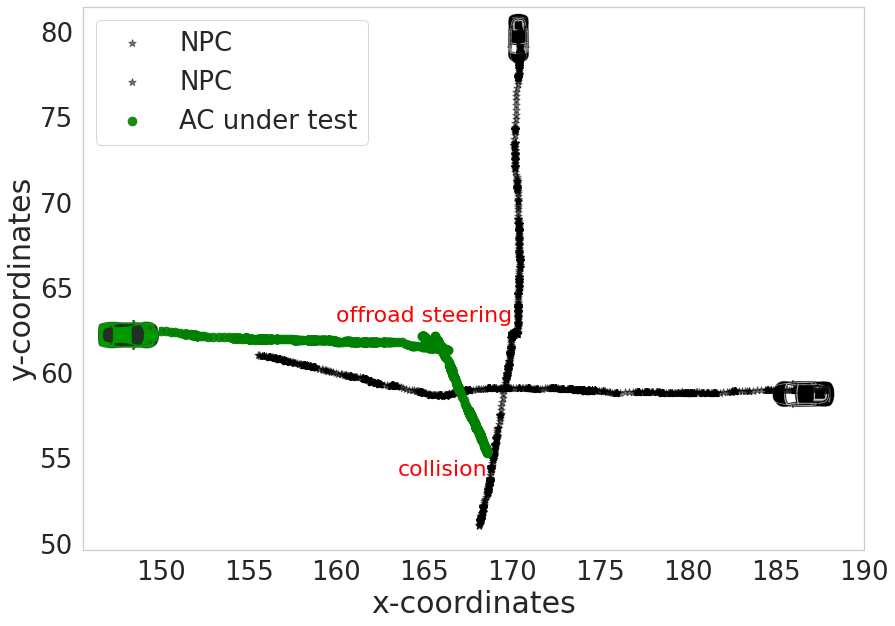

In [10]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][25571:27071], info_car1['y'][25571:27071], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car2['x'][25571:27071],info_car2['y'][25571:27071], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car3['x'][25571:27071], info_car3['y'][25571:27071], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

plt.text(160.0, 63, "offroad steering", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')
plt.text(163.5, 54, "collision", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')


im = Image.open('images_1.png')
newax = fig.add_axes([0.14, 0.385, 0.06, 0.06], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('black.png')
newax1 = fig.add_axes([0.8, 0.3, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')

im2 = Image.open('black_car-removebg-preview.png')
newax2 = fig.add_axes([0.535, 0.79, 0.09, 0.09], anchor='NW', zorder=1)
newax2.imshow(im2)
newax2.axis('off')
# plt.text(155.0, 57, "offroad steering + collision ", horizontalalignment='left', size='14', color='red', weight='semibold')

plt.savefig("RQ3_threeway_11.jpg", bbox_inches = "tight")

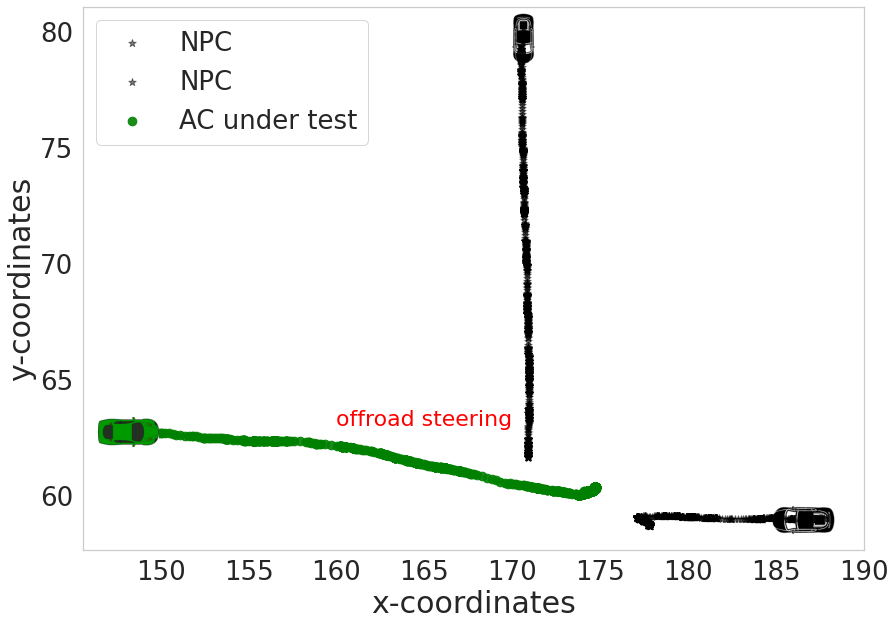

In [11]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][27072:28571], info_car1['y'][27072:28571], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car2['x'][27072:28571],info_car2['y'][27072:28571], s=60, c='black', marker="*", label='NPC',alpha =0.5,)
ax1.scatter(info_car3['x'][27072:28571], info_car3['y'][27072:28571], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)


plt.legend(loc='upper left', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

plt.text(160.0, 63, "offroad steering", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')
# plt.text(163.5, 54, "collision", horizontalalignment='left', size='22', color='red',fontname='Comic Sans MS')


im = Image.open('images_1.png')
newax = fig.add_axes([0.14, 0.25, 0.06, 0.06], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

im1 = Image.open('black.png')
newax1 = fig.add_axes([0.8, 0.125, 0.08, 0.08], anchor='NW', zorder=1)
newax1.imshow(im1)
newax1.axis('off')

im2 = Image.open('black_car-removebg-preview.png')
newax2 = fig.add_axes([0.54, 0.79, 0.09, 0.09], anchor='NW', zorder=1)
newax2.imshow(im2)
newax2.axis('off')
# plt.text(173.0, 62, "offroad steering", horizontalalignment='left', size='16', color='red', weight='semibold')

plt.savefig("RQ3_threeway_12.jpg", bbox_inches = "tight")

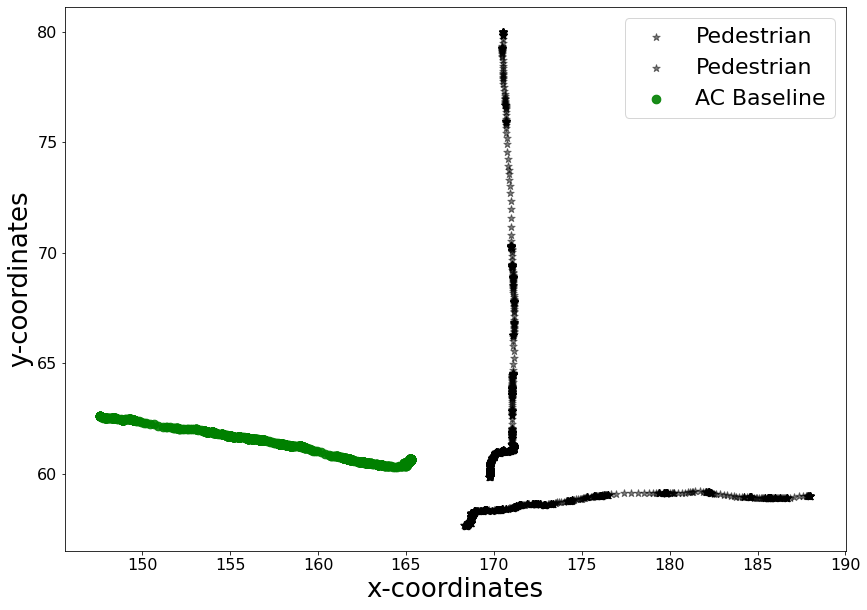

In [38]:

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



# ax1.scatter(info_car1['x'][18001:19500], info_car1['y'][18001:19500], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


ax1.scatter(info_car1['x'][28572:30071], info_car1['y'][28572:30071], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car2['x'][28572:30071],info_car2['y'][28572:30071], s=60, c='black', marker="*", label='Pedestrian',alpha =0.5,)
ax1.scatter(info_car3['x'][28572:30071], info_car3['y'][28572:30071], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


plt.legend(loc='upper right', fontsize=22)
plt.xlabel('x-coordinates', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('y-coordinates', fontsize=26)
# plt.text(173.0, 62, "offroad steering", horizontalalignment='left', size='16', color='red', weight='semibold')

plt.savefig("RQ3_threeway_13.pdf")

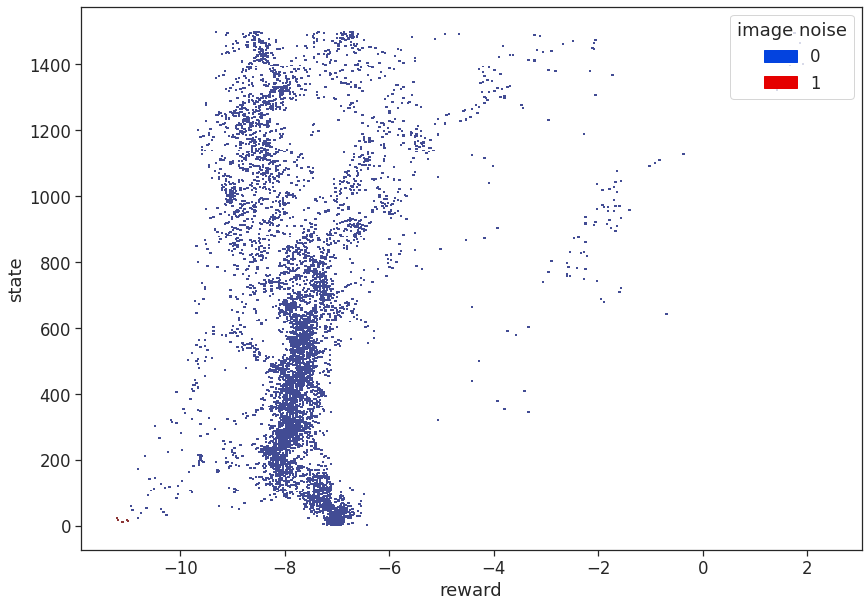

In [41]:
sns.reset_orig()
sns.set(font_scale = 1.5)

fig = plt.figure(figsize=(14,10))
my_palette = sns.color_palette(["#0343DF", "#E50000"])
sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
sns.histplot(
    info_car2PPO_episode_1, x="reward", y="state", hue="image noise", palette=my_palette,
    bins=500,
    pthresh=.4, pmax=.5, 
)
plt.savefig("RQ3_threeway_24.pdf")